# Classification: Wisconsin Breast Cancer
- Dataset from UCI repository
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

### Attribute Information:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

In [280]:
import pandas as pd

In [319]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = [
    'Code', 'ClumpThickness', 'CellSize', 'CellShape', 'Adhesion', 
    'SingleCellSize', 'Bare', 'Chromatin', 'Nucleoli', 'Mitoses', 'Class']
dataset = pd.read_csv(url, names=names)

### 지금까지 배운 모델을 사용해 유방암 여부를 예측하는 좋은 성능의 모델을 만들어보세요.

In [320]:
##Bare.. 컬럼삭제(결측치 ? 제거)
dataset.drop(['Bare'], axis=1)
dataset

,Code,ClumpThickness,CellSize,CellShape,Adhesion,SingleCellSize,Bare,Chromatin,Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [401]:
## X = Class를 제외한 변수지정, y = Class(유방암 유무 판단 y값)
feature_cols = ['ClumpThickness', 'CellSize', 'CellShape', 'Adhesion', 'SingleCellSize', 'Chromatin', 'Nucleoli', 'Mitoses']
X = dataset[feature_cols]
y = dataset.Class.map({2:0, 4:1})

In [402]:
## X변수끼리 상관관계 확인
X.corr()

,ClumpThickness,CellSize,CellShape,Adhesion,SingleCellSize,Chromatin,Nucleoli,Mitoses
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034
CellSize,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693
CellShape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911
Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633
SingleCellSize,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101
Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169
Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000


In [405]:
X.corr().CellSize

ClumpThickness    0.644913
CellSize          1.000000
CellShape         0.906882
Adhesion          0.705582
SingleCellSize    0.751799
Chromatin         0.755721
Nucleoli          0.722865
Mitoses           0.458693
Name: CellSize, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001DA936A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001F619E10>]], dtype=object)

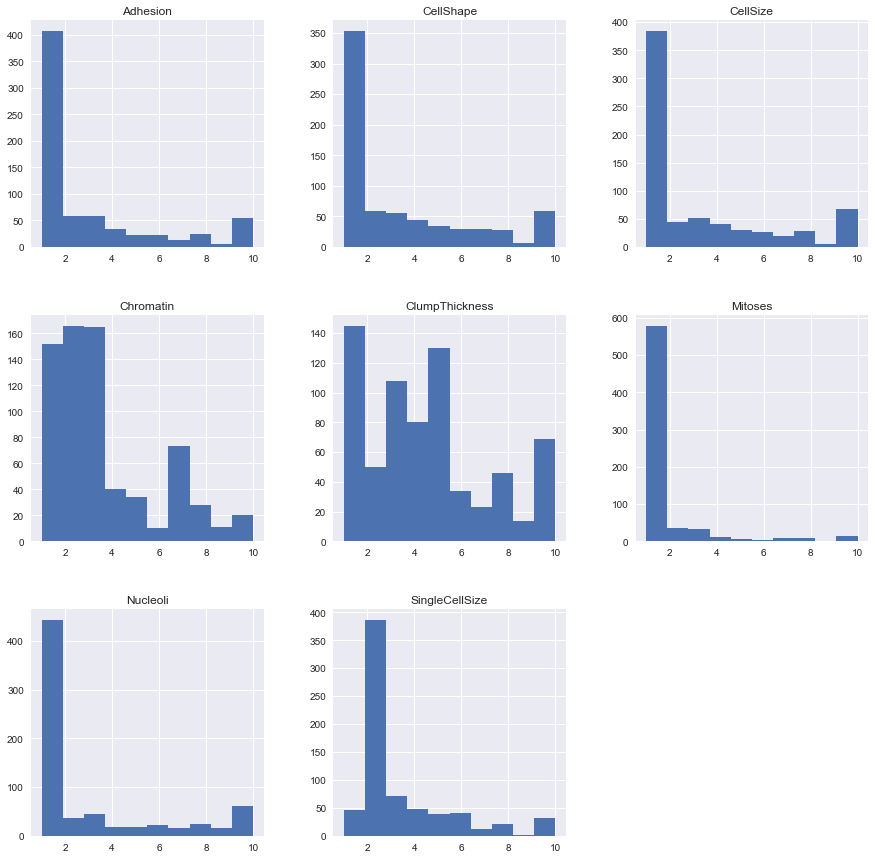

In [329]:
## X 히스토그램확인
import matplotlib.pyplot as plt
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['font.size'] = 14
# Show histograms
X.hist()

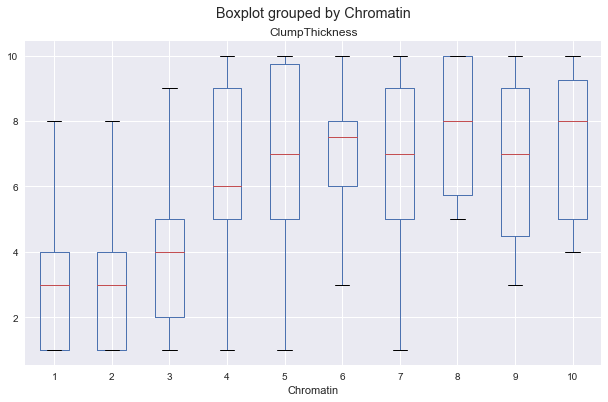

In [331]:
# box plot of rentals, grouped by season
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 12
X.boxplot(column='ClumpThickness', by='Chromatin')

In [434]:
## 확률이 높은 모델을 만들기 위해 상관관계가 큰 변수만 이용
feature_cols = ['ClumpThickness', 'CellShape', 'Chromatin', 'CellSize']
X = dataset[feature_cols]
y = dataset.Class.map({2:0, 4:1})

In [435]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200)

In [436]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
print(list(zip(feature_cols, logreg.coef_[0])))

[('ClumpThickness', 0.52951713290025637), ('CellShape', 0.59415594274959693), ('Chromatin', 0.49444185451129519), ('CellSize', 0.47321425644167919)]


In [437]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [438]:
# calculate classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

LR = metrics.accuracy_score(y_test, y_pred_class)

0.977142857143


In [439]:
# make an instance of a k-NN classifier object
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [440]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [441]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [442]:
y_pred = knn.predict(X_test)

In [443]:
# calculate classification accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)

In [444]:
print(accuracy)
print(cm)

KNN = accuracy

0.96
[[114   3]
 [  4  54]]


In [445]:
# Because all variables in iris dataset are numerical, we use Haussian naive Bayes.
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_2 = gnb.predict(X_test)

In [446]:
accuracy = metrics.accuracy_score(y_test, y_pred_2)
cm = metrics.confusion_matrix(y_test, y_pred_2)

In [447]:
print(accuracy)
print(cm)

NB = accuracy

0.965714285714
[[113   4]
 [  2  56]]


In [448]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [449]:
y_pred_3 = treeclf.predict(X_test)

In [450]:
accuracy = metrics.accuracy_score(y_test, y_pred_3)
cm = metrics.confusion_matrix(y_test, y_pred_3)

In [451]:
print(accuracy)
print(cm)

DT = accuracy

0.931428571429
[[112   5]
 [  7  51]]


In [469]:
##z = [LR, KNN, NB, DT]
z = {'LR' : [LR], 'KNN' : [KNN], 'NB' : [NB], 'DT' : [DT]}
frame = DataFrame(z)

In [470]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [472]:
##결과

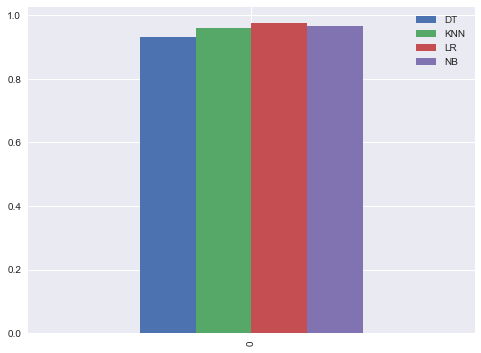

In [471]:
# compare with bar plot
frame.plot(kind='bar')
plt.plot(frame)
